In [15]:
#TOGGLE ON/OFF CODE
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# <div align="center">  Welcome!

Welcome to SPIKE Prime! This set includes a lot of really cool parts that you can use to build and code your own robots. In this notebook, you're going to learn about some of the basic parts you have in your kit, what they are used for, and get a chance to see them work!

Then, you will go through a series of notebooks where you build exciting, hands-on projects with SPIKE Prime yourself!

Let's get started!

## <div align="center">  Jupyter Notebooks

This interface we're using is called a Jupyter Notebook! It is an easy way to write code an run it quickly. Jupyter Notebooks are made up of many "cells" that can contain text, images, or code! 
<br><br>
To create a new cell, you can press the "+" button towards the top of the screen. 
<br><br>
The most important thing you need to know in a Jupyter Notebook is how to run them. In order to test out code, you need to "run" each cell one by one. To do that, click on the cell you want to run, and then click the "Run" button at the top of the screen.

## <div align="center">  The Hub

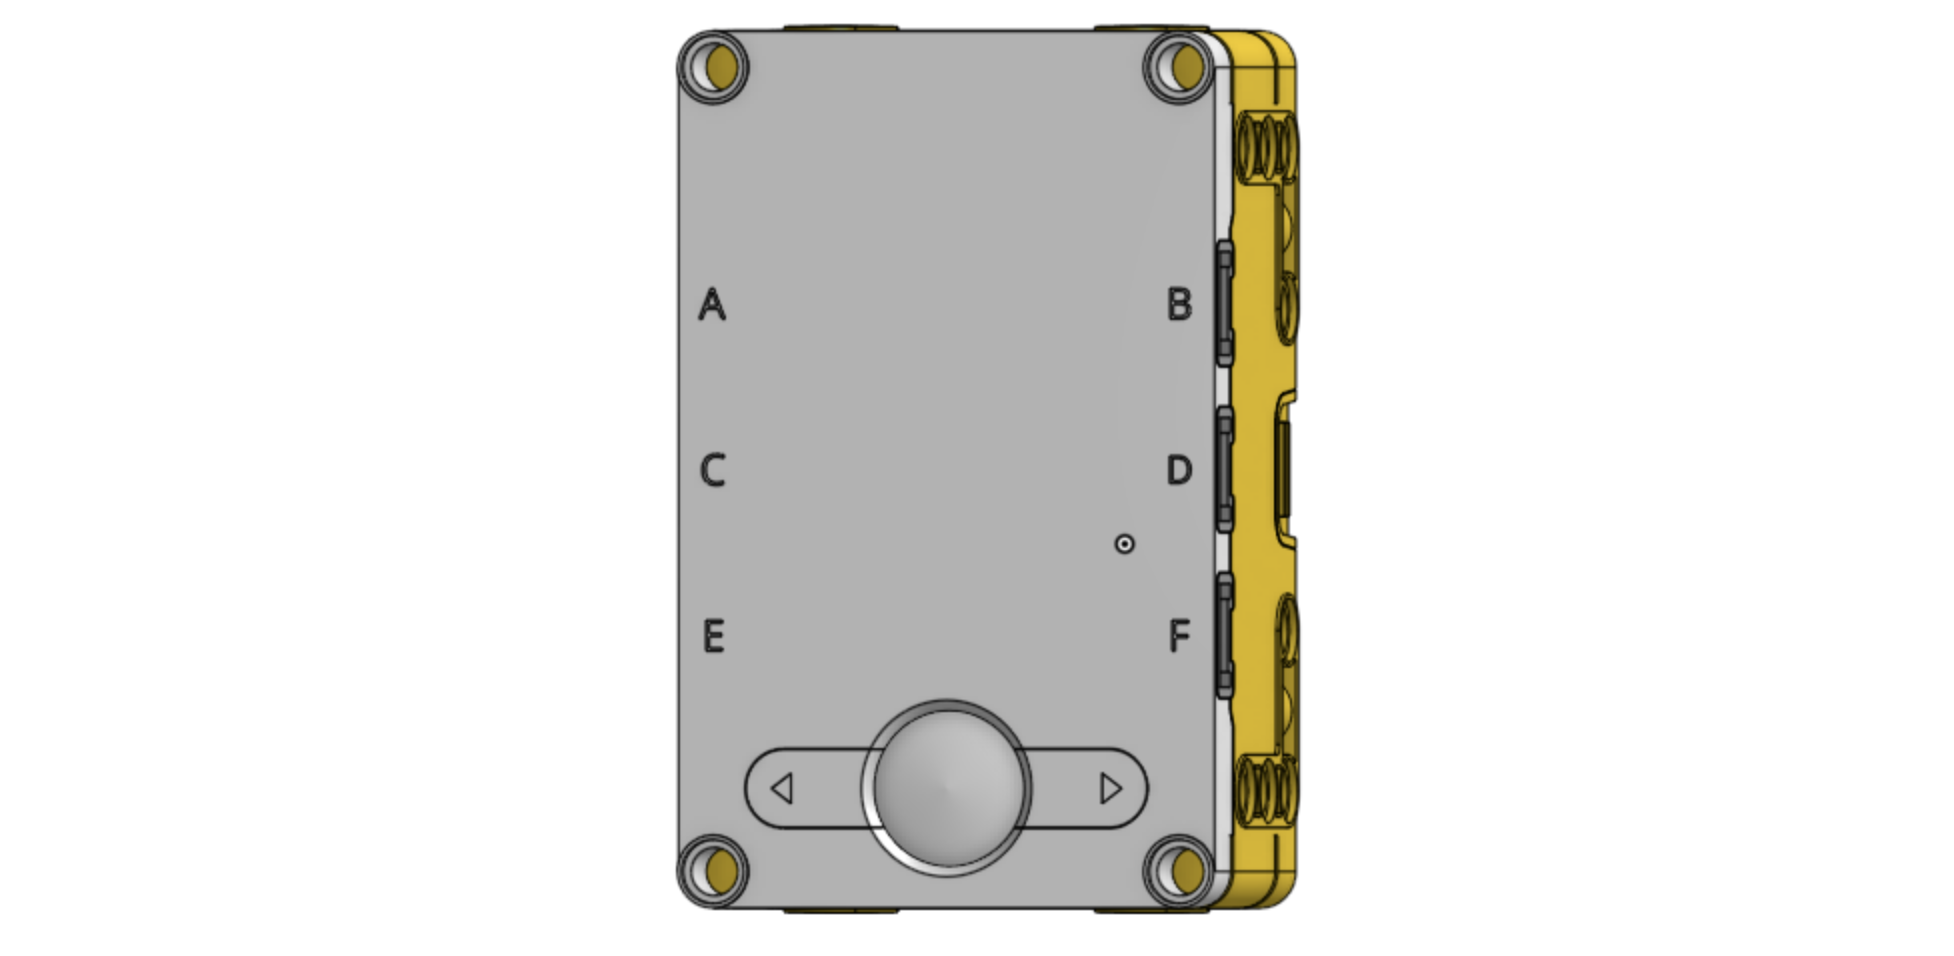

The hub is the most important part of your SPIKE Prime kit! Every robot you build will include the hub: it provides a way for your robot to communicate with the computer and carry out any code you run! It also has 6 ports, which allow you to connect different motors and sensors. To turn on the hub, press the center button.
<br><br>
You should see it light up and display a heart! This means your hub is running the "heart program," which allows you to run your robot without even coding it yet! We'll try this out soon.
<br><br>
Your hub can be connected to your computer or through the cable that connects to the top of the hub. In a minute, we'll show you how to connect to your computer!

## <div align="center">  Motors

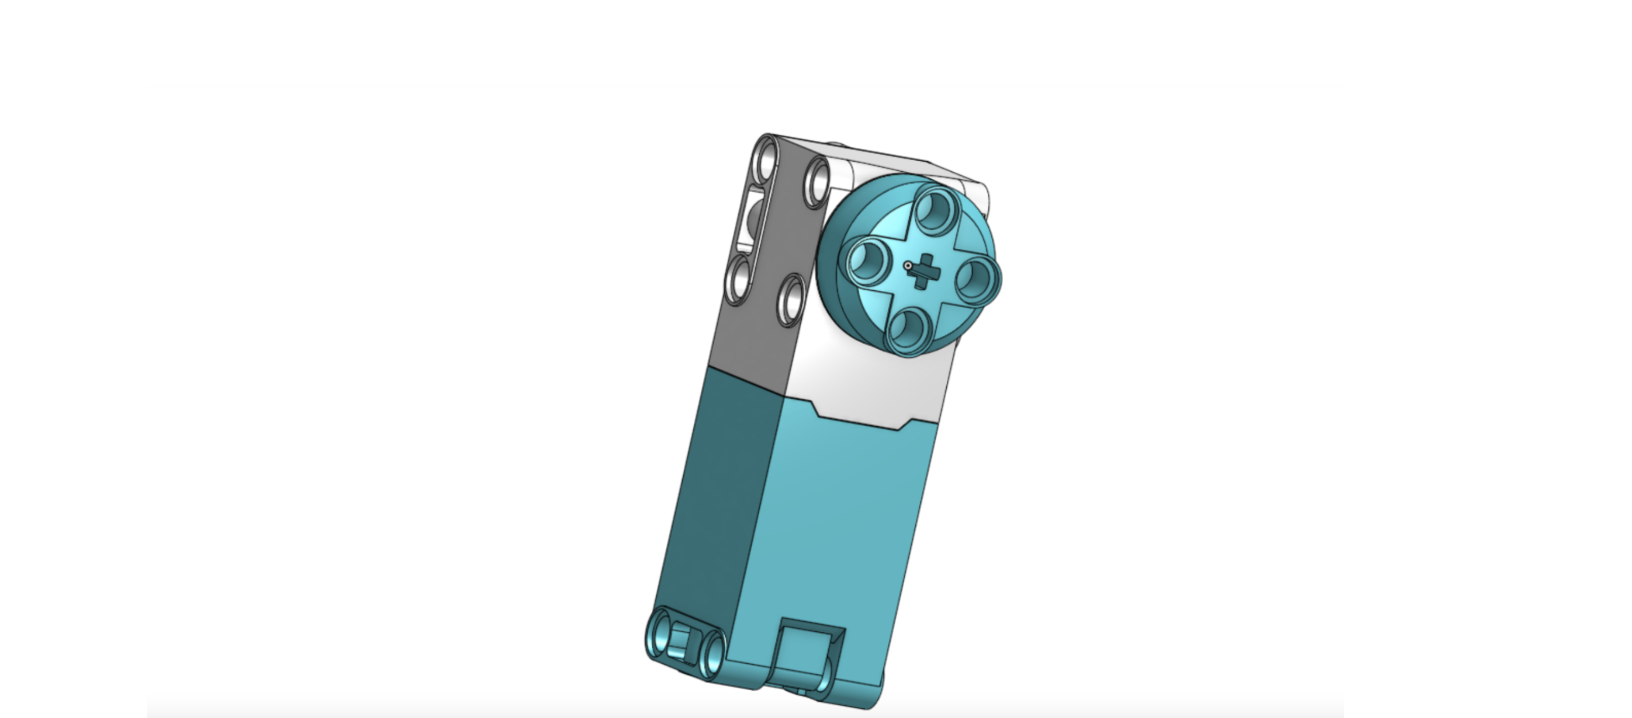

Your kit comes with 2 small motors and 1 large motor. They allow you to create motion and allow your robot to move around!
<br><br>
Let's use the motor. While the heart image is displayed on your hub, plug the motor into port A.
<br><br>
Then, press the center button again to run the heart program!
<br><br>
You can press the two buttons on either side of the center to control the motor speed and direction. Try it out!
<br><br>
If you want to stop the motor, you can press the center button again.

What if we want to control the motor with code? Let's connect to the hub!

In [1]:
#CONNECTING TO SPIKE (MOTOR IN PORT A)

import serial
import sys
import glob
import time
import serial.tools.list_ports
import ipywidgets as widgets
from ipywidgets import HBox, Label, Layout
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import clear_output


ser = None

def serial_ports():
    result = []
    ports = serial.tools.list_ports.comports()
    for port, desc, hwid in sorted(ports):
        comm =  "{}: {}".format(port, desc)
        result.append(comm) 
    return result

def InitSerial(port, bps = 9600, to = 0):
    global ser
    try:
        ser = serial.Serial(port, bps, timeout = to)  # open serial port
        ser.flushInput()
        ser.flushOutput()
        return ser.name
    except Exception as e:
        return 'ERR: ' + str(e)

def CloseSerial():
    return('done')
    try:
        ser.flush()
        ser.close()
        return 'done'
    except Exception as e:
        return 'ERR: ' + str(e)    

def WriteSerial(string):
    try:
        reply = ser.write(string.encode())
        return str(reply)
    except Exception as e:
        return 'ERR: ' + str(e)    

def ReadSerial():
    try:
        reply = ''
        while ser.in_waiting:
            reply = reply + ser.readline().decode()
        return reply
    except Exception as e:
        return 'ERR: ' +  str(e)
    
def SendRead(string):
    if WriteSerial(string):
        time.sleep(0.1)
        return ReadSerial()
    
updatedPortList = []

def search_for_ports():
#     updatedPortList = []
    serialPortList = serial_ports()
    for x in serialPortList:
        updatedPortList.append(x[:x.index(':')])
SerialPort = ""
def on_value_change(change):
    with output2:
        SerialPort = change['new']
        InitSerial(SerialPort,115200)
        WriteSerial('\x03')
        run_some_code()
        
def run_some_code():
    connectCode = '''
import hub,utime
    '''
    motorTest = '''
import hub,utime
hub.port.A.info()
    '''
    WriteSerial('\x05')
    WriteSerial(connectCode)
    WriteSerial('\x04')
    time.sleep(1) #wait for everything to get over there and read all the replies
    if (len(ReadSerial())==88):
        WriteSerial('\x05')
        WriteSerial(motorTest)
        WriteSerial('\x04')
        time.sleep(1) #wait for everything to get over there and read all the replies
        if (len(ReadSerial())==1499):
            print("You are now connected to SPIKE Prime!")
            return 0
        else:
            print("You are now connected to SPIKE Prime!")
            return None
    else:
        print("Error, try reconnecting or connecting to a different serial port.")
        return None

updatedPortList = []
search_for_ports()
dropdown = widgets.Select(
            options=updatedPortList,
            description='Select Port:',
            disabled=False)
output2 = widgets.Output()
display(dropdown, output2)
dropdown.observe(on_value_change, names='value')
# note if the timeout is anything but zero it is slow

Select(description='Select Port:', options=('/dev/cu.BLTH', '/dev/cu.Bluetooth-Incoming-Port', '/dev/cu.LEGOHu…

Output()

Now, we can run the motor in any way we can using code! You'll learn how to write your own code later on, but for now, try running the motor using the buttons below!

In [2]:
#MOVE MOTORS USING BUTTONS

from IPython.display import display
#FORWARD
forward_button = widgets.Button(description="Forward")
display(forward_button)

def go_forward(b):
    forward_motor = '''hub.port.A.motor.pwm(50)
'''
    WriteSerial('\x05')
    WriteSerial(forward_motor)
    WriteSerial('\x04')

forward_button.on_click(go_forward)

#BACKWARD
backward_button = widgets.Button(description="Backward")
display(backward_button)

def go_backward(b):
    backward_motor = '''hub.port.A.motor.pwm(-50)
'''
    WriteSerial('\x05')
    WriteSerial(backward_motor)
    WriteSerial('\x04')

backward_button.on_click(go_backward)

#STOP
stop_button = widgets.Button(description="Stop")
display(stop_button)

def stop(b):
    stop_motor = '''hub.port.A.motor.brake()
'''
    WriteSerial('\x05')
    WriteSerial(stop_motor)
    WriteSerial('\x04')

stop_button.on_click(stop)

Button(description='Forward', style=ButtonStyle())

Button(description='Backward', style=ButtonStyle())

Button(description='Stop', style=ButtonStyle())

We can also control the speed of the motor to be whatever we want. The speed ranges from -100 to 100. Try adjusting it!

In [3]:
#ADJUSTING SPEED IN REAL TIME WITH SLIDER
from ipywidgets import interact

@interact(speed=(-100, 100))
def double_number(speed):
    print("The motor's speed is %d." % (speed))

    stop_motor = '''hub.port.A.motor.pwm(%d)
    '''%(speed)
    WriteSerial('\x05')
    WriteSerial(stop_motor)
    WriteSerial('\x04')

interactive(children=(IntSlider(value=0, description='speed', min=-100), Output()), _dom_classes=('widget-inte…

## <div align="center">  Color Sensor

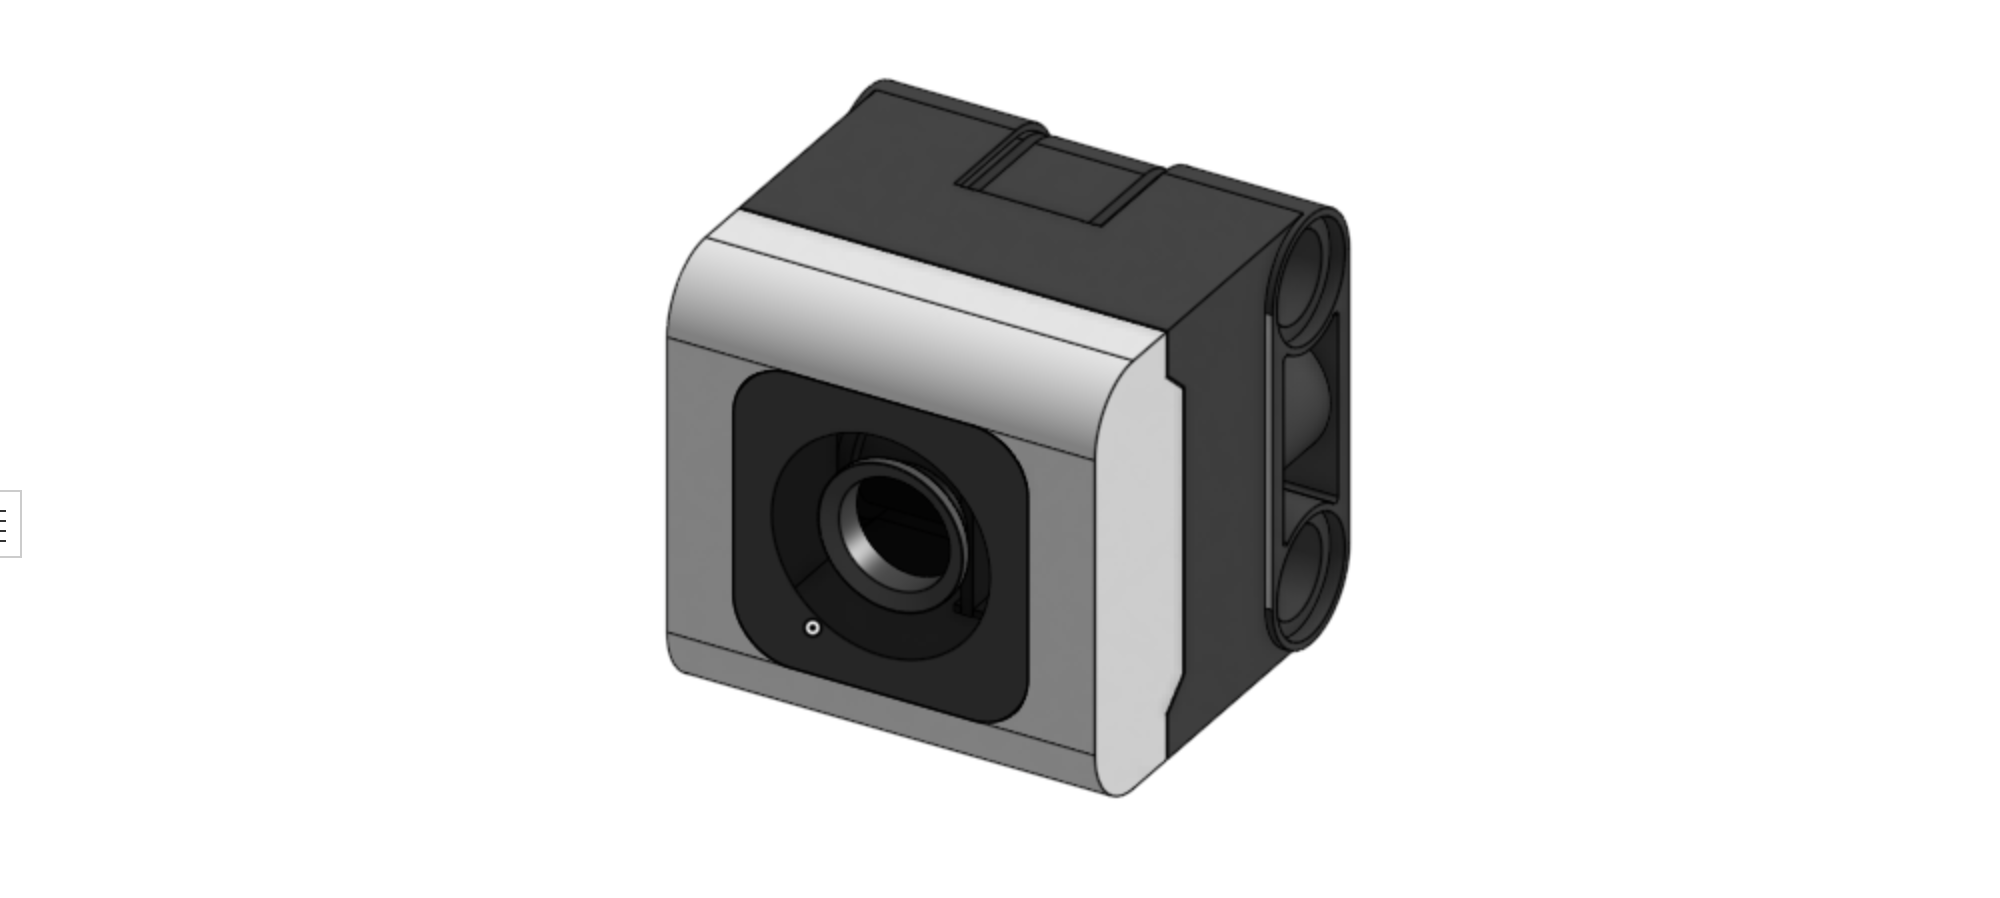

The color sensor can detect different colors, ambient light, or tell how much light is reflected back at it. Let's try it out! Plug the motor sensor into port A and hold up an object of a certain color near the color sensor. Press the button, and the sensor will tell you what color it sees!

In [4]:
#BUTTON
from IPython.display import display
force_button = widgets.Button(description="Read Color")
display(force_button)

import time

def read_color():
    string=''
    fred = '  '
    while len(fred):
        time.sleep(0.1)
        fred = ReadSerial()
        string = string+fred
    return string
    
WriteSerial('import hub\r\n')
WriteSerial('light_sensor = hub.port.A.device\r\n')
#print(read())
for i in range(10):
    WriteSerial('print(light_sensor.get()[0])\r\n')
    print(read().split('\r\n')[-2])

force_button.on_click(read_color)

Button(description='Read Color', style=ButtonStyle())

NameError: name 'read' is not defined

Play around with the type of material you hold up to the sensor, the color of the material, and the distance between the sensor and the material. The sensor isn't perfect. What works best?

## <div align="center">  Distance Sensor

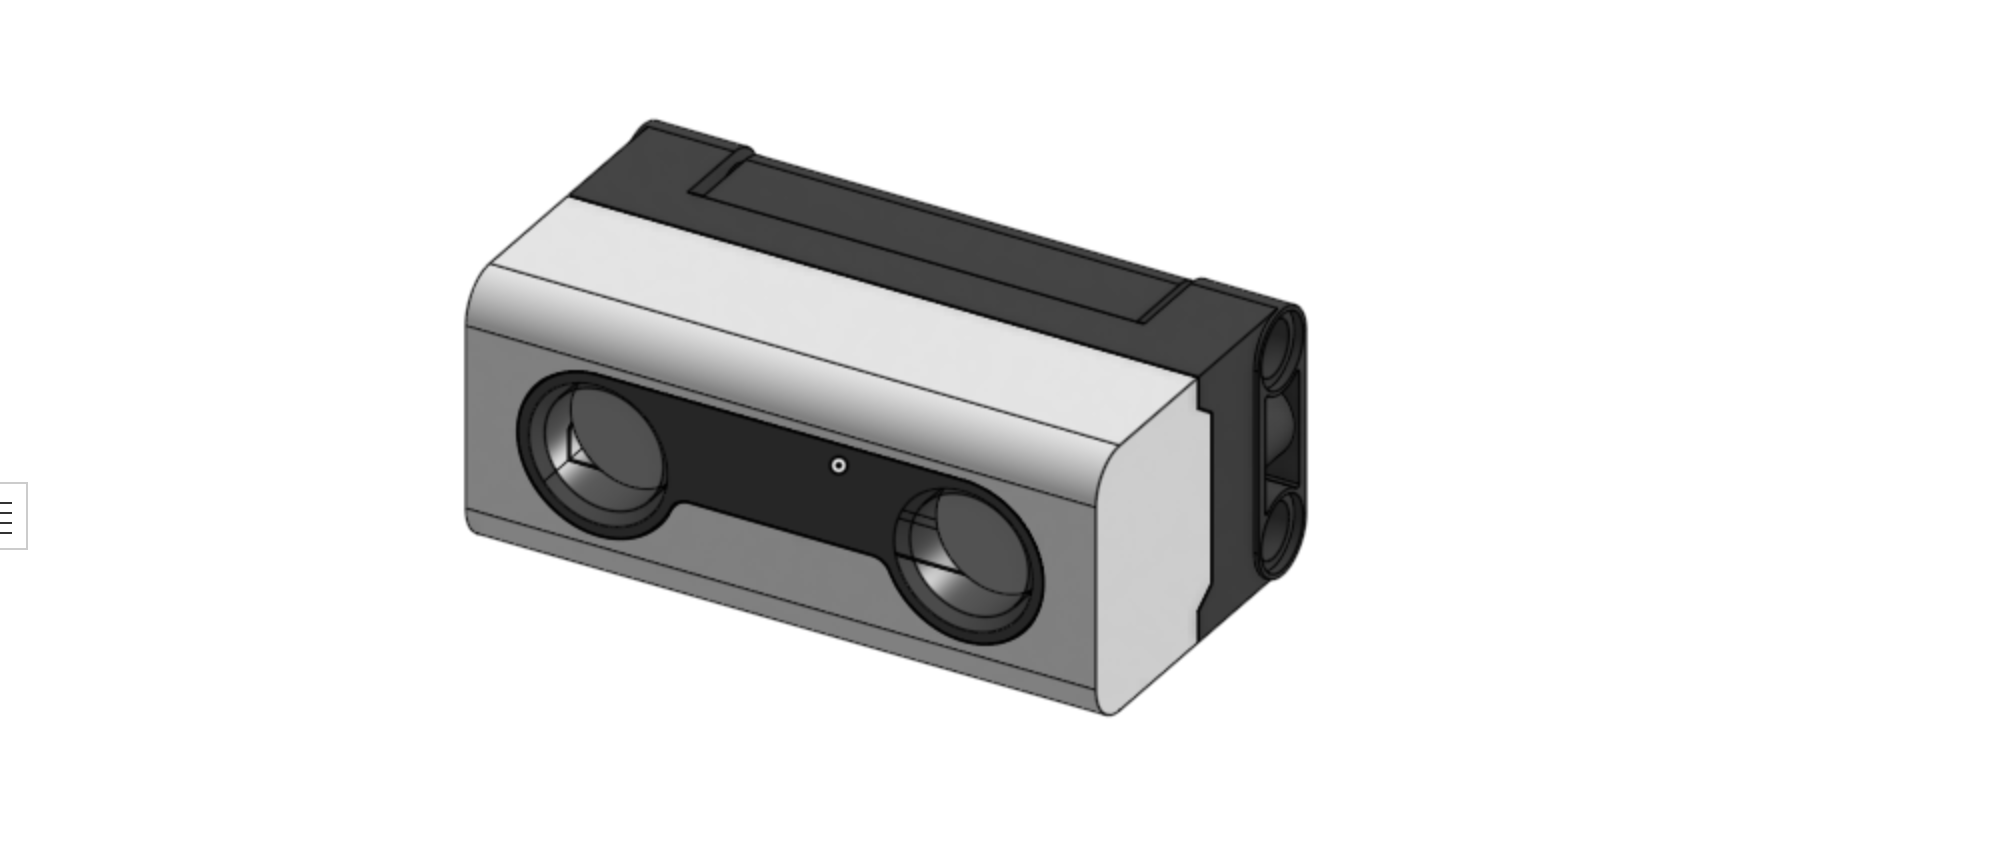

This sensor can measure the distance between itself and a nearby object ranging between about 5 cm to 20 cm away. Let's see how it works! Connect the distance sensor to port A, place the sensor in front of a nearby object, and and press the button below to see how far the object is!

In [16]:
#BUTTON
from IPython.display import display
force_button = widgets.Button(description="Read Distance")
display(force_button)

import time

def read_distance():
    string=''
    fred = '  '
    while len(fred):
        time.sleep(0.1)
        fred = ReadSerial()
        string = string+fred
    return string
    
WriteSerial('import hub\r\n')
WriteSerial('sonic_sensor = hub.port.A.device\r\n')
#print(read())
for i in range(10):
    WriteSerial('print(sonic_sensor.get()[0])\r\n')
    print(read().split('\r\n')[-2])

force_button.on_click(read_distance)

Button(description='Read Distance', style=ButtonStyle())

0
0
0
0
0
0
0
0
0
0


## <div align="center">  Force Sensor

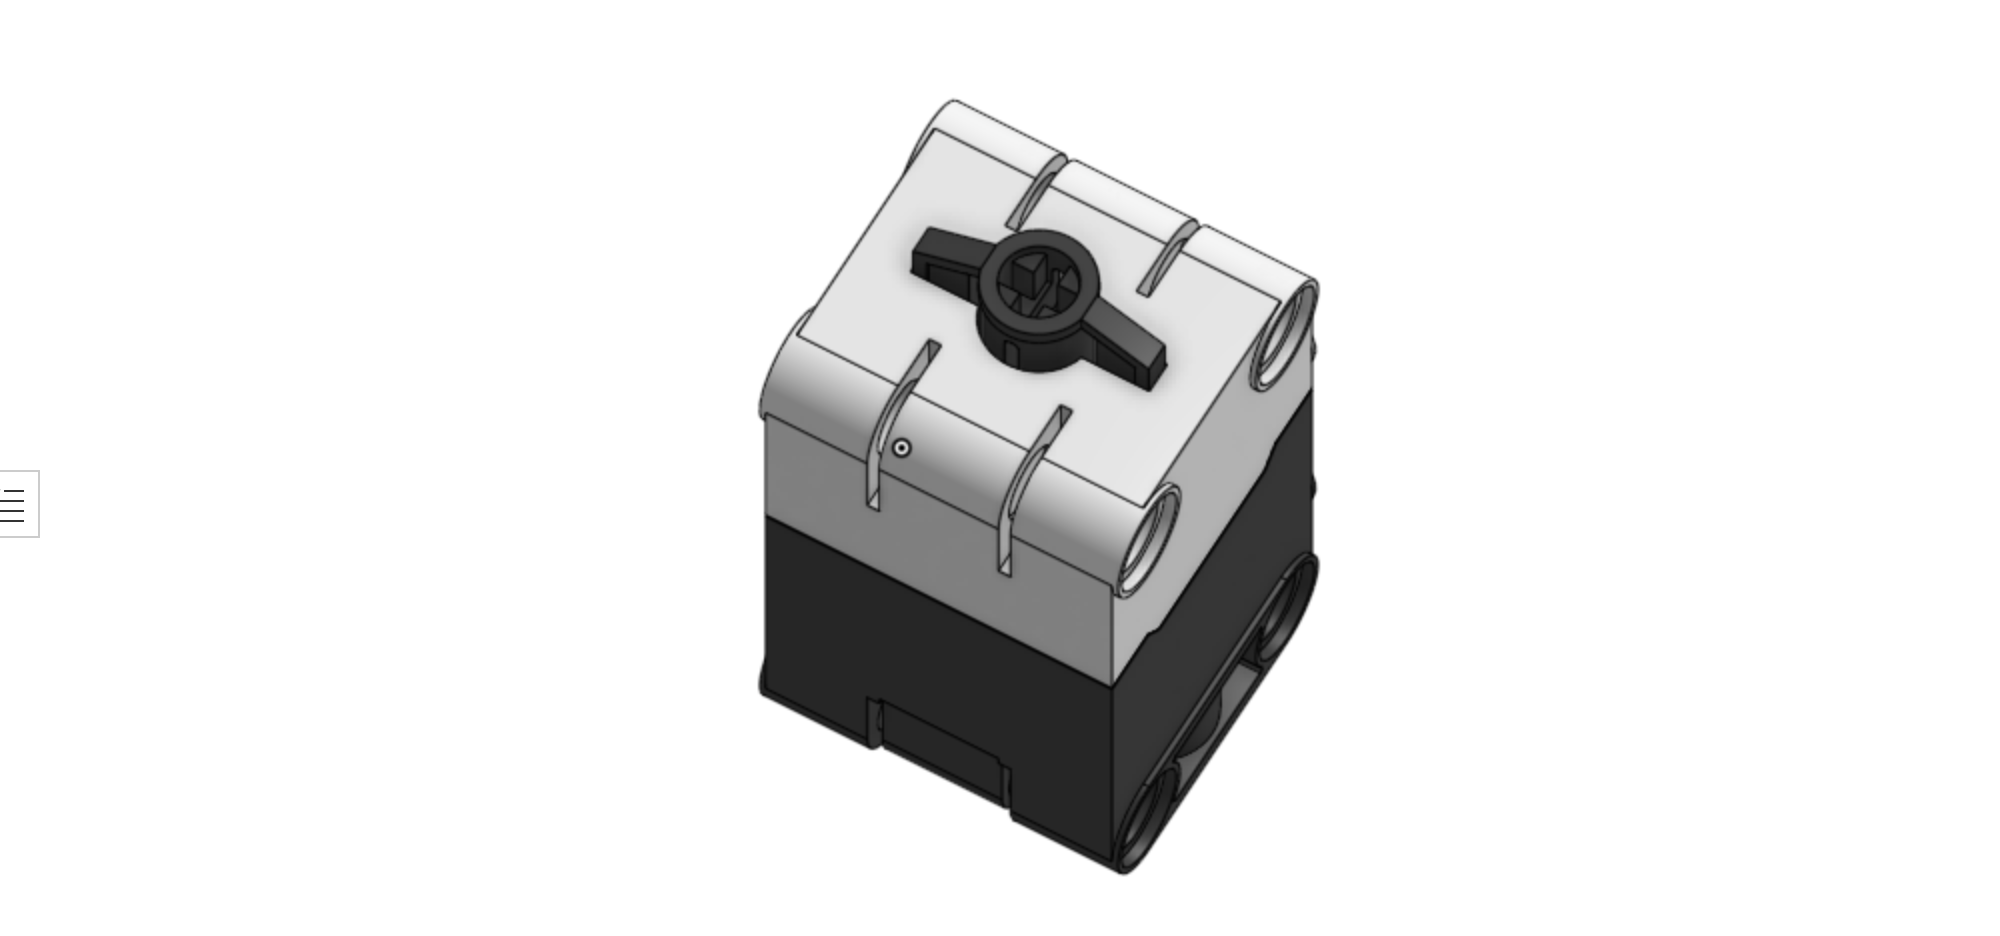

This sensor can tell if the button is pressed down, and can even tell the amount of force (in Newtons) being applied to it.
<br><br>
Press down on the sensor, and click the button below to see how much force you are applying!

In [17]:
#BUTTON
from IPython.display import display
force_button = widgets.Button(description="Read Force")
display(force_button)

import time

def read_force():
    string=''
    fred = '  '
    while len(fred):
        time.sleep(0.1)
        fred = ReadSerial()
        string = string+fred
    return string
    
WriteSerial('import hub\r\n')
WriteSerial('force_sensor = hub.port.A.device\r\n')
#print(read())
for i in range(10):
    WriteSerial('print(force_sensor.get()[0])\r\n')
    print(read().split('\r\n')[-2])

force_button.on_click(read_force)

Button(description='Read Force', style=ButtonStyle())

0
0
0
0
0
0
0
0
0
0


## <div align="center">  Sensors and Motors

You can also use sensors and motors together to control your robot! For example, you might want to control the speed of a motor using a button (force sensor!). Try plugging your force sensor into port A, and your motor into port B.
<br><br>
Then, run the cell below! As you press harder on your button, your motor should move faster!

In [2]:
#Update to correct code from other version.

from ipywidgets import interact
import time

from IPython.display import display
force_button = widgets.Button(description="Read Force")
display(force_button)

@interact(speed=(-100, 100))
def double_number(speed):
    print("The motor's speed is %d." % (speed))

    stop_motor = '''
        hub.port.A.motor.pwm(%d)
    '''%(speed)
    WriteSerial('\x05')
    WriteSerial(stop_motor)
    WriteSerial('\x04')
    
#BUTTON



def read_force():
    string=''
    fred = '  '
    while len(fred):
        time.sleep(0.1)
        fred = ReadSerial()
        string = string+fred
    return string
    
WriteSerial('import hub\r\n')
WriteSerial('force_sensor = hub.port.A.device\r\n')
#print(read())
for i in range(10):
    WriteSerial('print(force_sensor.get()[0])\r\n')
    print(read().split('\r\n')[-2])

force_button.on_click(read_force)

Button(description='Read Force', style=ButtonStyle())

interactive(children=(IntSlider(value=0, description='speed', min=-100), Output()), _dom_classes=('widget-inte…

NameError: name 'read' is not defined

As you work through this set of Jupyter Notebooks, you will build lots of cool robots and learn more about SPIKE Prime using your hub, sensors, motors, and other pieces! Good luck!

You have reached the end of Module 0!